# Team Members
   Abhisekhar Bharadwaj Gandavarapu <br>
   Taylor Fisher<br>
   Ayan Gautam<br>

## Import Libraries and Read CSV File

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import plotly.express as px

# Load datasets
taxi_data = pd.read_csv("Taxi_Data.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")
city_data = pd.read_csv("City.csv")


print(taxi_data.head())
print(customer_data.head())
print(city_data.head())
print(transaction_data.head())

   Transaction ID  Date of Travel   Company        City  \
0        10000011           42377  Pink Cab  ATLANTA GA   
1        10000012           42375  Pink Cab  ATLANTA GA   
2        10000013           42371  Pink Cab  ATLANTA GA   
3        10000014           42376  Pink Cab  ATLANTA GA   
4        10000015           42372  Pink Cab  ATLANTA GA   

   Distance Travelled(KM)  Price Charged  Cost of Trip  
0                   30.45         370.95       313.635  
1                   28.62         358.52       334.854  
2                    9.04         125.20        97.632  
3                   33.17         377.40       351.602  
4                    8.73         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
             City   P

<br/>

## Relationships between various factors and taxi usage (Taylor"s Section)

#### In this section, we're exploring the relationships between various factors and taxi usage, particularly focusing on distance traveled, income, age, and spending on taxi services:

Distance Traveled vs. Cost of Trip:
* Analyzing the relationship between distance traveled and the cost of the trip.
* Investigating the variability in costs for longer distances.
* Discussing potential factors influencing the cost of the trip, such as traffic conditions or specific routes.

Income vs. Distance Traveled:
* Examining whether there's a correlation between a person's income and the distance they travel in a taxi.
* Considering possible additional variables that might influence distance traveled.

Age vs. Spending on Taxi Services:
* Investigating the correlation between age and spending on taxi services.
* Discussing potential factors influencing spending on taxi services within different age groups.

<br/>

### What is the relationship between distance traveled and cost of the trip?

Text(0.5, 1.0, 'Distance of Taxi Ride and Cost of Trip')

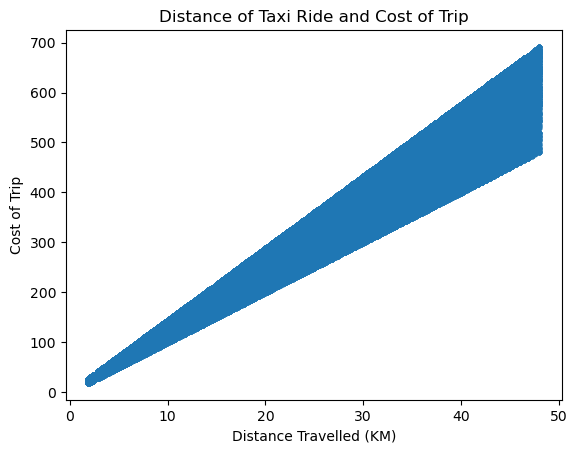

In [2]:
date = taxi_data['Distance Travelled(KM)']
distance = taxi_data['Cost of Trip']
plt.scatter(date, distance, s=10)
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Cost of Trip')
plt.title('Distance of Taxi Ride and Cost of Trip')

### Is there a correlation between income and distance travelled in taxi?

Text(0.5, 1.0, 'Comparing Income with Disance Travelled in a Taxi')

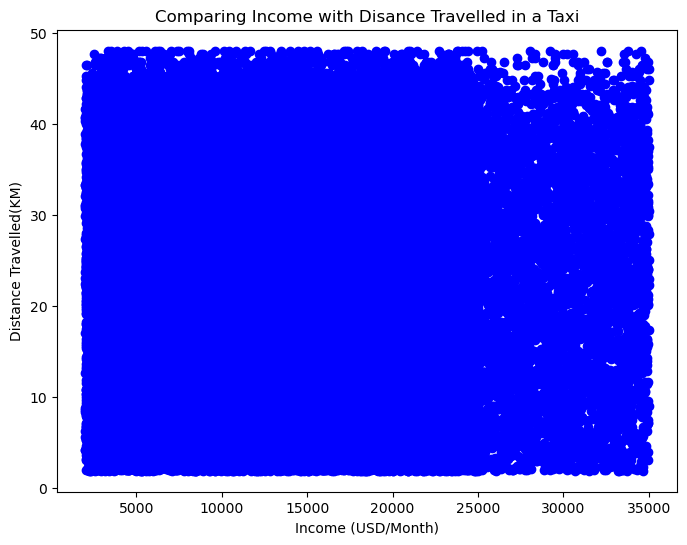

In [3]:
num_rows = min(len(customer_data), len(taxi_data))
x = customer_data['Income (USD/Month)'].iloc[:num_rows]
y = taxi_data['Distance Travelled(KM)'].iloc[:num_rows]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Distance Travelled(KM)')
plt.title('Comparing Income with Disance Travelled in a Taxi')


* There does not seem to be a correlation between a person's income and the distance they travel in a taxi

<br/>

### Is there a correlation between age and spending on taxi services?

Text(0.5, 1.0, 'Comparing Age with Spending on Taxis')

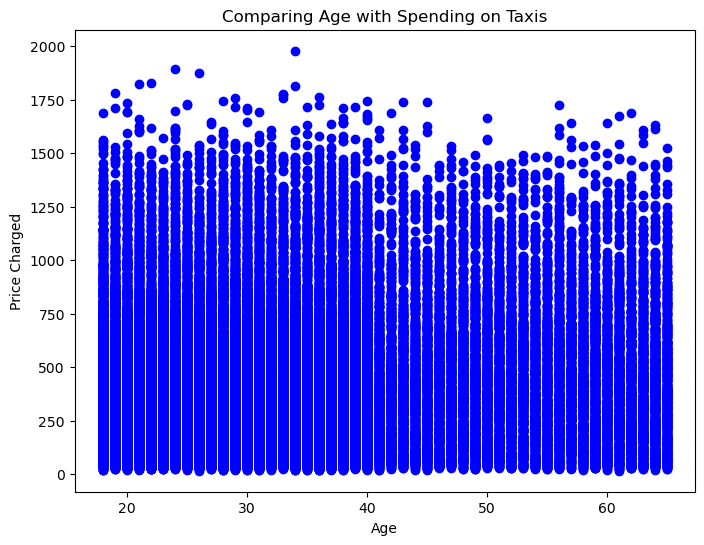

In [4]:

num_rows = min(len(customer_data), len(taxi_data))
x = customer_data['Age'].iloc[:num_rows]
y = taxi_data['Price Charged'].iloc[:num_rows]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Age')
plt.ylabel('Price Charged')
plt.title('Comparing Age with Spending on Taxis')


* While there is no clear correlation between age and spending on taxi services, there down seem to be a very slight downward trend. 
* It appears that younger people tend to spend a little more on taxis compared to older people.

<br/>

<br/>

## This section focuses on analyzing various aspects of taxi service data, including profitability, payment modes, average prices, customer spending, and demographics of top-spending customers. (Abhi's Section)

1. **Profitability Analysis by Company and City**:
   
2. **Profitability Analysis by Payment Mode**:

3. **Profitability Analysis by Payment Mode and Company**:

4. **Average Price of Trips per City**:

5. **Average Distance Traveled per Trip by Company and City**:

6. **Customer Spending and Demographics Analysis**:
   

### What is the profitability of each cab company, and how does it vary by city?

- Calculate the profitability of each trip by subtracting the cost of the trip from the price charged.
- group the data by company and city to find the average profit per trip for each combination of company and city

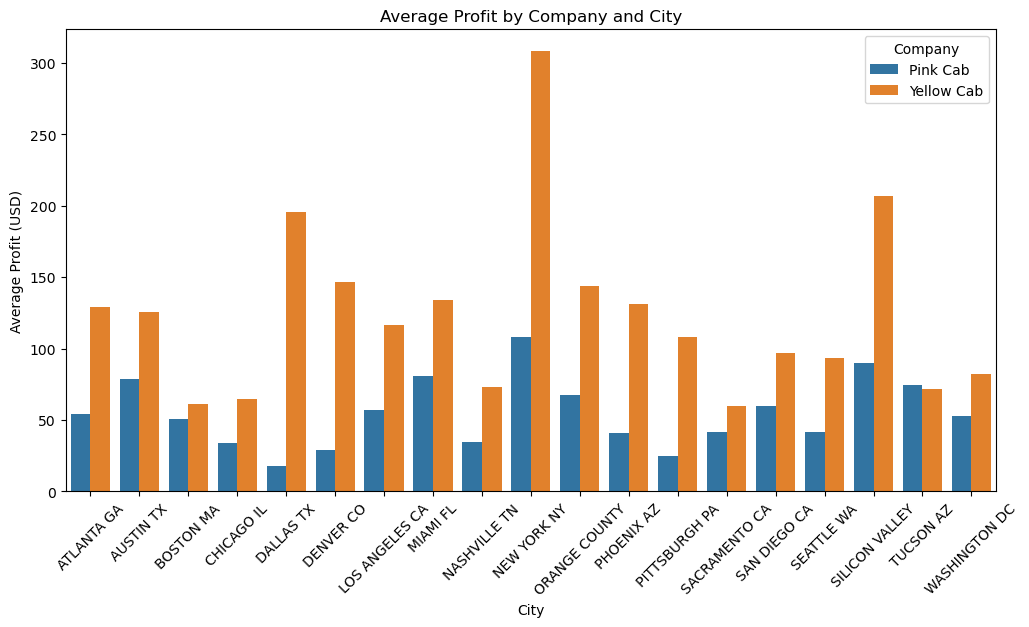

In [5]:
# Calculate profitability
taxi_data['Profit'] = taxi_data['Price Charged'] - taxi_data['Cost of Trip']

# Group by company and city to get average profit
profit_by_company_city = taxi_data.groupby(['Company', 'City'])['Profit'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Profit', hue='Company', data=profit_by_company_city)
plt.title('Average Profit by Company and City')
plt.xlabel('City')
plt.ylabel('Average Profit (USD)')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()


- The visualization presents a bar plot showing the average profit by company and city, allowing you to compare the profitability across different companies and cities.
This data shows the average profit for each combination of company and city. Here are some observations and analyses:

1. **Pink Cab vs. Yellow Cab**:
   - In most cities, Yellow Cab seems to have higher average profits compared to Pink Cab.
   - For instance, in New York, Yellow Cab's average profit is significantly higher at $307.86 compared to Pink Cab's $108.22.

2. **Variation Across Cities**:
   - Profitability varies significantly across different cities for both Pink Cab and Yellow Cab.
   - For Pink Cab, Miami has the highest average profit at $81.07, while Dallas has the lowest at $17.92.
   - For Yellow Cab, New York has the highest average profit at $307.86, while Sacramento has the lowest at $60.02.

3. **Differences Within Cities**:
   - In some cities, there's a notable difference between the average profits of Pink Cab and Yellow Cab.
   - For example, in Chicago, Yellow Cab's average profit is $64.92, while Pink Cab's is $34.05.
   - Similarly, in Los Angeles, Yellow Cab's average profit is $116.66, significantly higher than Pink Cab's $56.67.

4. **Potential Factors**:
   - Factors influencing these differences could include market share, pricing strategies, operating costs, demand, and competition.
   - Yellow Cab generally has higher prices, possibly indicating premium services or higher demand in certain areas.
   - Pink Cab's lower prices may attract a different customer segment or compete more aggressively on price.

5. **Implications**:
   - These differences suggest opportunities for both companies. For Pink Cab, improving profitability might involve examining cost structures or optimizing pricing strategies.
   - For Yellow Cab, maintaining high profitability might involve understanding and catering to the needs of their higher-paying customer base.


###  Is there a significant difference in profitability between different payment modes?
- The second block merges transaction data with taxi data.
- It calculates the profitability of each trip and groups the data by payment mode to find the average profit per trip for each payment mode.

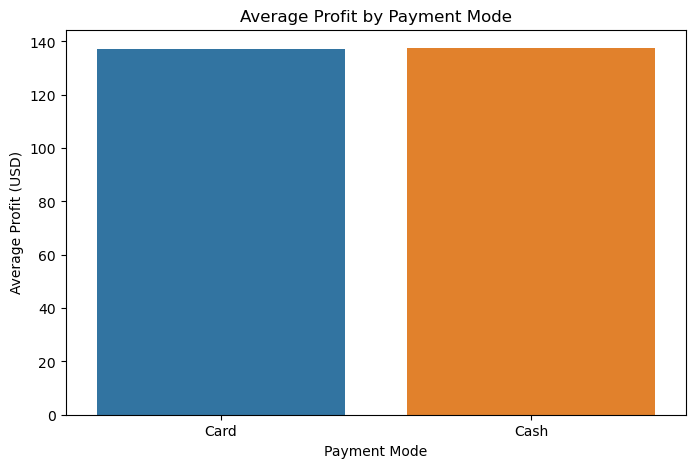

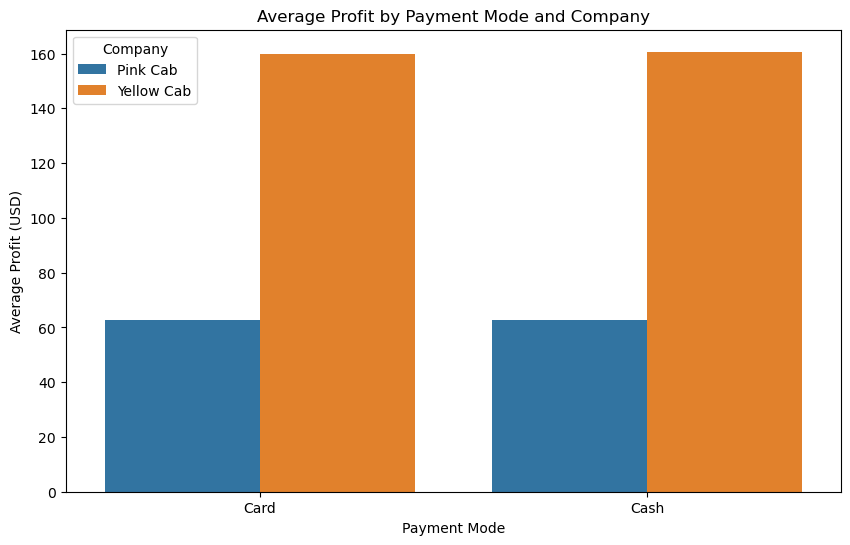

  Payment_Mode      Profit
0         Card  137.086461
1         Cash  137.502924

  Payment_Mode     Company      Profit
0         Card    Pink Cab   62.710282
1         Card  Yellow Cab  159.978626
2         Cash    Pink Cab   62.565472
3         Cash  Yellow Cab  160.681874


In [6]:
# Merge transaction_data with taxi_data
merged_data = pd.merge(transaction_data, taxi_data, on='Transaction ID')

# Calculate profitability
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']

# Group by payment mode to get average profit
profit_by_payment_mode = merged_data.groupby('Payment_Mode')['Profit'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Payment_Mode', y='Profit', data=profit_by_payment_mode)
plt.title('Average Profit by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Average Profit (USD)')
plt.show()

# Group by payment mode and company to get average profit
profit_by_payment_mode_company = merged_data.groupby(['Payment_Mode', 'Company'])['Profit'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment_Mode', y='Profit', hue='Company', data=profit_by_payment_mode_company)
plt.title('Average Profit by Payment Mode and Company')
plt.xlabel('Payment Mode')
plt.ylabel('Average Profit (USD)')
plt.legend(title='Company')
plt.show()

print(profit_by_payment_mode)
print()
print(profit_by_payment_mode_company)

- The visualization presents a bar plot showing the average profit by payment mode

- **Payment Mode Analysis**:
  - Card payments average $137.09 profit, while cash payments average $137.50.
  - Profitability doesn't significantly differ between payment modes.

- **Company Analysis**:
  - Yellow Cab's average profit is notably higher: $159.98 with cards and $160.68 with cash.
  - Pink Cab's average profit is significantly lower: $62.71 with cards and $62.57 with cash.

- **Overall**:
  - Yellow Cab is far more profitable than Pink Cab, regardless of payment mode.
  - Payment mode doesn't affect profitability much.

### Average Price of Trips Per City
- This section calculates the average price of trips in each city.

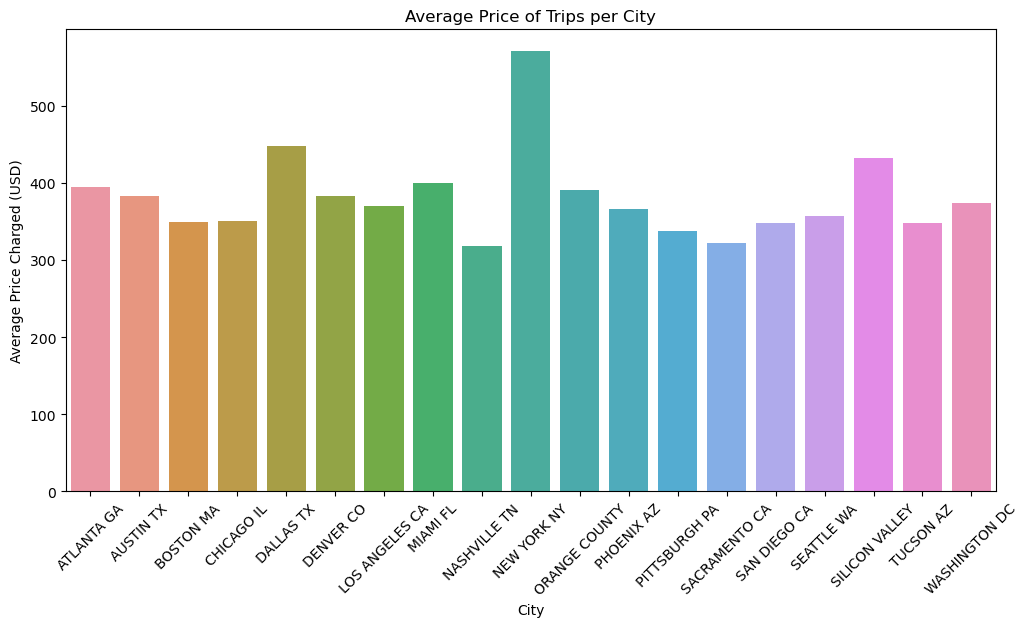

In [7]:
# Calculate average price of trips per city
avg_price_per_city = taxi_data.groupby('City')['Price Charged'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Price Charged', data=avg_price_per_city)
plt.title('Average Price of Trips per City')
plt.xlabel('City')
plt.ylabel('Average Price Charged (USD)')
plt.xticks(rotation=45)
plt.show()


 - The visualization presents a bar plot showing the average price of trips for each city, allowing you to understand price variations across different cities.
 
**Price Charged by City**:
  - New York has the highest average price charged at 570.20, indicating high demand or premium services.
  - Dallas follows with 447.83, possibly due to a combination of factors like distance, demand, and local economy.
  - Silicon Valley and Atlanta also have relatively high prices charged, suggesting similar dynamics.
  - Nashville has the lowest average price charged at 318.64, possibly due to lower demand or shorter trips.

**Overall Observations**:
  - Pricing varies significantly across cities, reflecting differences in demand, distance, and local economic conditions.
  - High prices in cities like New York and Silicon Valley may indicate a higher cost of living or higher demand for transportation services.
  - Lower prices in cities like Nashville and Sacramento may suggest less demand or shorter trip distances.

<br/>

### How efficient are cab companies in terms of distance traveled per trip, and how does it vary across cities?
- This block calculates the average distance traveled per trip by each company in each city.

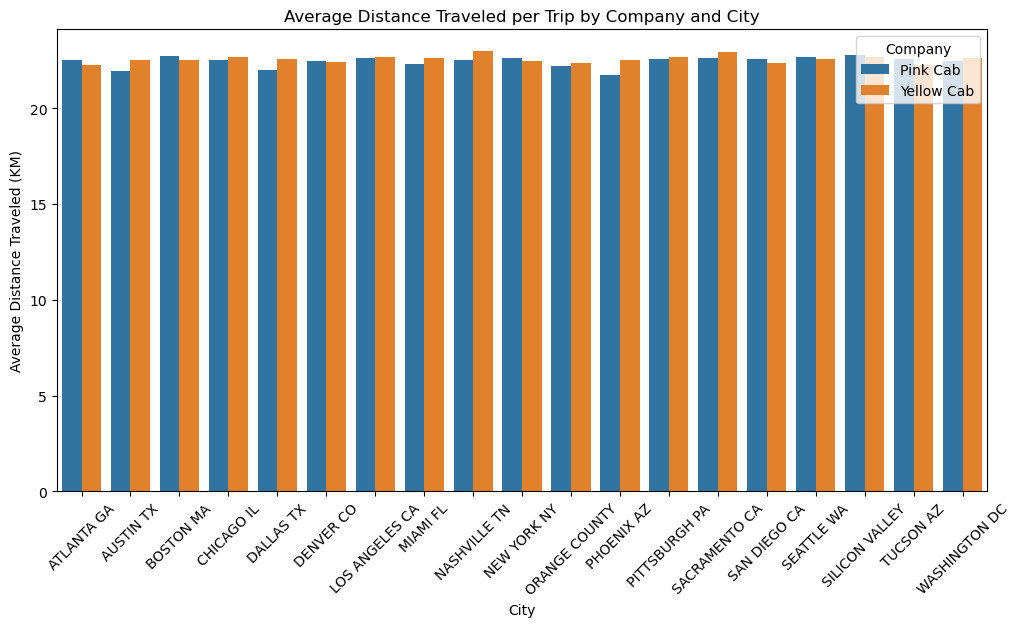

In [8]:
# Calculate average distance traveled per trip
avg_distance_per_trip = taxi_data.groupby(['Company', 'City'])['Distance Travelled(KM)'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Distance Travelled(KM)', hue='Company', data=avg_distance_per_trip)
plt.title('Average Distance Traveled per Trip by Company and City')
plt.xlabel('City')
plt.ylabel('Average Distance Traveled (KM)')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()



- The visualization presents a bar plot showing the average distance traveled per trip for each company in each city.
- **Distance Travelled by Company and City**:
  - Pink Cab and Yellow Cab seem to cover similar distances across cities, averaging around 22.5 kilometers per trip.
  - There's not much variation in distance travelled between the two companies, indicating similar service coverage.
  - Yellow Cab's longest average trip is in Sacramento at 22.95 kilometers, while Pink Cab's longest is in Silicon Valley at 22.79 kilometers.
  - Yellow Cab's shortest average trip is in Tucson at 22.27 kilometers, while Pink Cab's shortest is in Phoenix at 21.75 kilometers.

- **Overall Observations**:
  - Pink Cab and Yellow Cab operate similarly in terms of distance covered per trip across cities.
  - The variations in distance travelled are relatively minor between cities and companies, suggesting consistent service provision across the board.
  - The differences in trip distance between cities are not substantial, indicating a consistent service radius or demand pattern across cities.

<br/>

### What are the characteristics of the top 10% of customers by spending on taxi services?

- The final block merges necessary datasets (taxi data, transaction data, and customer data).
- It calculates the total spending per customer and identifies the top 10% of customers based on their spending.
- Descriptive statistics (gender distribution, age distribution, and income distribution) of these top-spending customers are calculated and visualized.

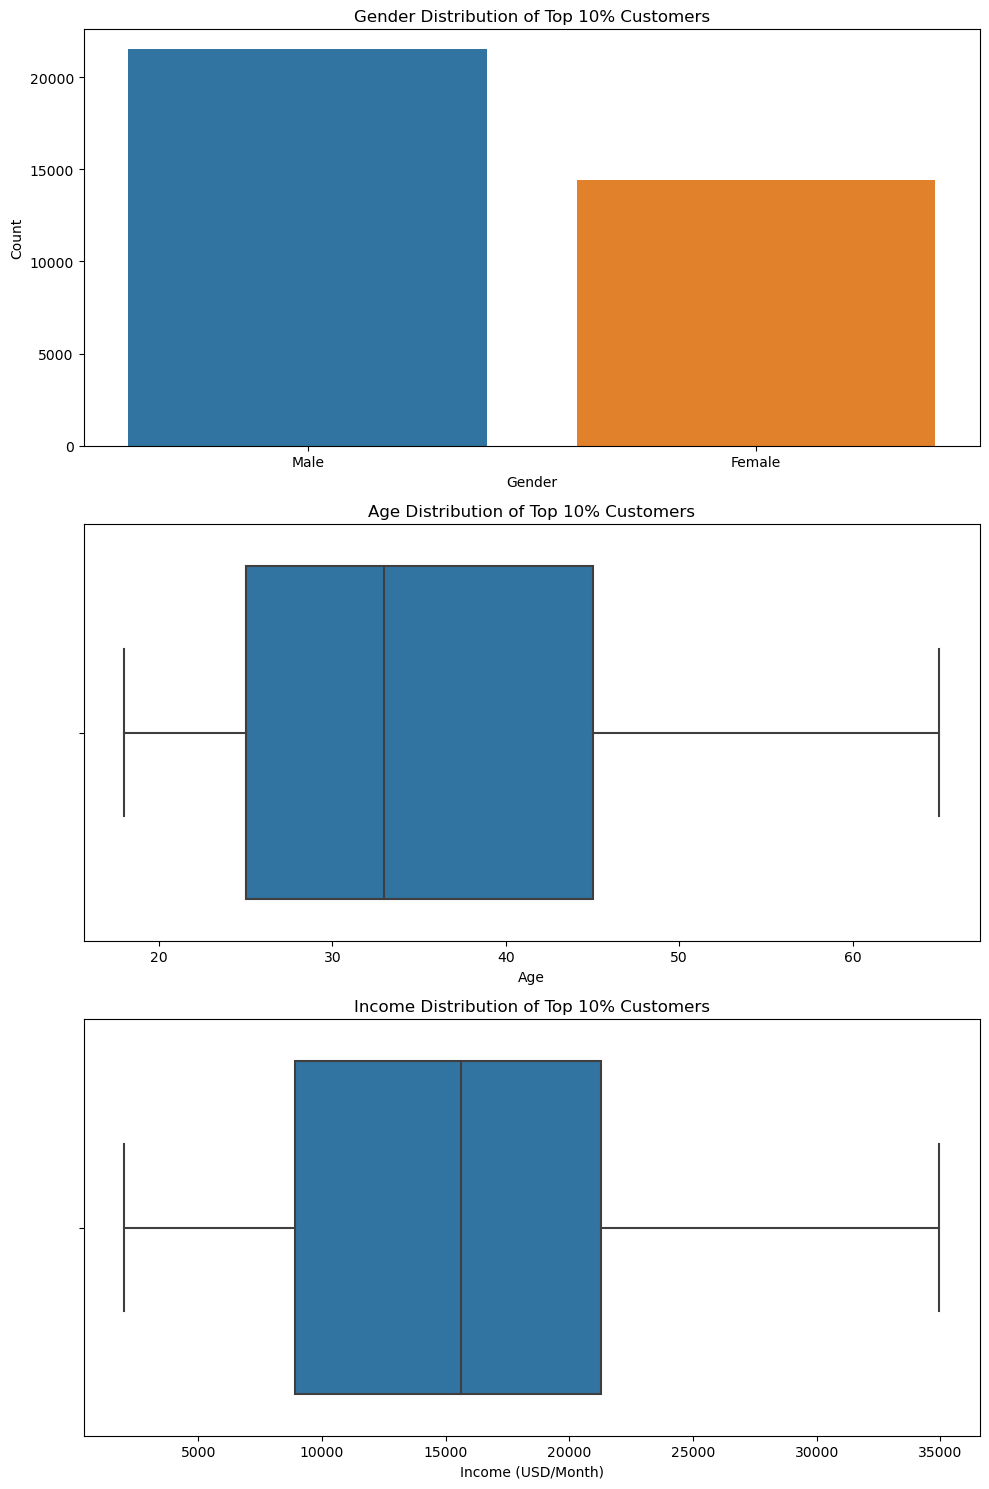

Characteristics of the Top 10% of Customers by Spending on Taxi Services: 

                Age  Income (USD/Month)
count  35948.000000        35948.000000
mean      35.583760        15455.790698
std       12.871728         7826.960037
min       18.000000         2012.000000
25%       25.000000         8911.000000
50%       33.000000        15614.000000
75%       45.000000        21263.000000
max       65.000000        34953.000000


In [9]:
# Merge necessary datasets
merged_data = pd.merge(pd.merge(taxi_data, transaction_data, on='Transaction ID'), customer_data, on='Customer ID')

# Calculate spending per customer
merged_data['Total Spending'] = merged_data.groupby('Customer ID')['Price Charged'].transform('sum')

# Identify top 10% of customers by spending
top_10_percent_customers = merged_data[merged_data['Total Spending'] >= merged_data['Total Spending'].quantile(0.9)]

# Descriptive statistics on demographics of top-spending customers
top_10_percent_customers_demographics = top_10_percent_customers[['Gender', 'Age', 'Income (USD/Month)']]

# Descriptive statistics
top_10_percent_customers_stats = top_10_percent_customers_demographics.describe()

# Set up figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot gender distribution
sns.countplot(x='Gender', data=top_10_percent_customers_demographics, ax=axes[0])
axes[0].set_title('Gender Distribution of Top 10% Customers')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot age distribution
sns.boxplot(x='Age', data=top_10_percent_customers_demographics, ax=axes[1])
axes[1].set_title('Age Distribution of Top 10% Customers')
axes[1].set_xlabel('Age')

# Plot income distribution
sns.boxplot(x='Income (USD/Month)', data=top_10_percent_customers_demographics, ax=axes[2])
axes[2].set_title('Income Distribution of Top 10% Customers')
axes[2].set_xlabel('Income (USD/Month)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

# Print descriptive statistics
print("Characteristics of the Top 10% of Customers by Spending on Taxi Services: \n")
print(top_10_percent_customers_stats)

## Ayan's Section